Importing all necessary libraries:

1.import pandas for data preprocessing

2.import numpy for array processing

3.import math to perform mathematical functions

4.import matplotlib.pyplot to draw graphs

5.import sklearn for a python machine learning library

6.import keras for high level neural network platform in python, runs on the top of TensorFlow or Theano

In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import math
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from matplotlib.pyplot import figure
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\Sen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load data as from csv file(provide the csv file name as file_name.csv) 

In [14]:
#load data
dataset = read_csv('test_problem.csv')

Cleaning the dataset by droping the first two coloumns as they are not necessary as features:

1.Replace the value of goal for binary classification where '0' as 'negative' class and '1' and '2' as 'positive' class.

2.Save the cleaned and process dataset into a new file name.

In [3]:
#Droping frist two columns from the dataset
dataset.drop('ID_TestSet', axis=1, inplace= True)
dataset.drop('file', axis=1, inplace= True)

# Values in the selected column to find and their replacements
find_values = [0, 1, 2]
replace_with = ['positive', 'negative', 'negative']

# Find and replace values in the selected 'goal column
dataset['goal'] = dataset['goal'].replace(find_values, replace_with)

#save the dataset into a new csv file
dataset.to_csv('intern_dataset_binary.csv')

Ploting the dataset:

1.Plot every features of the dataset using matplotlib.pyplot library in a single frame

2.Show the top five values of the new dataset

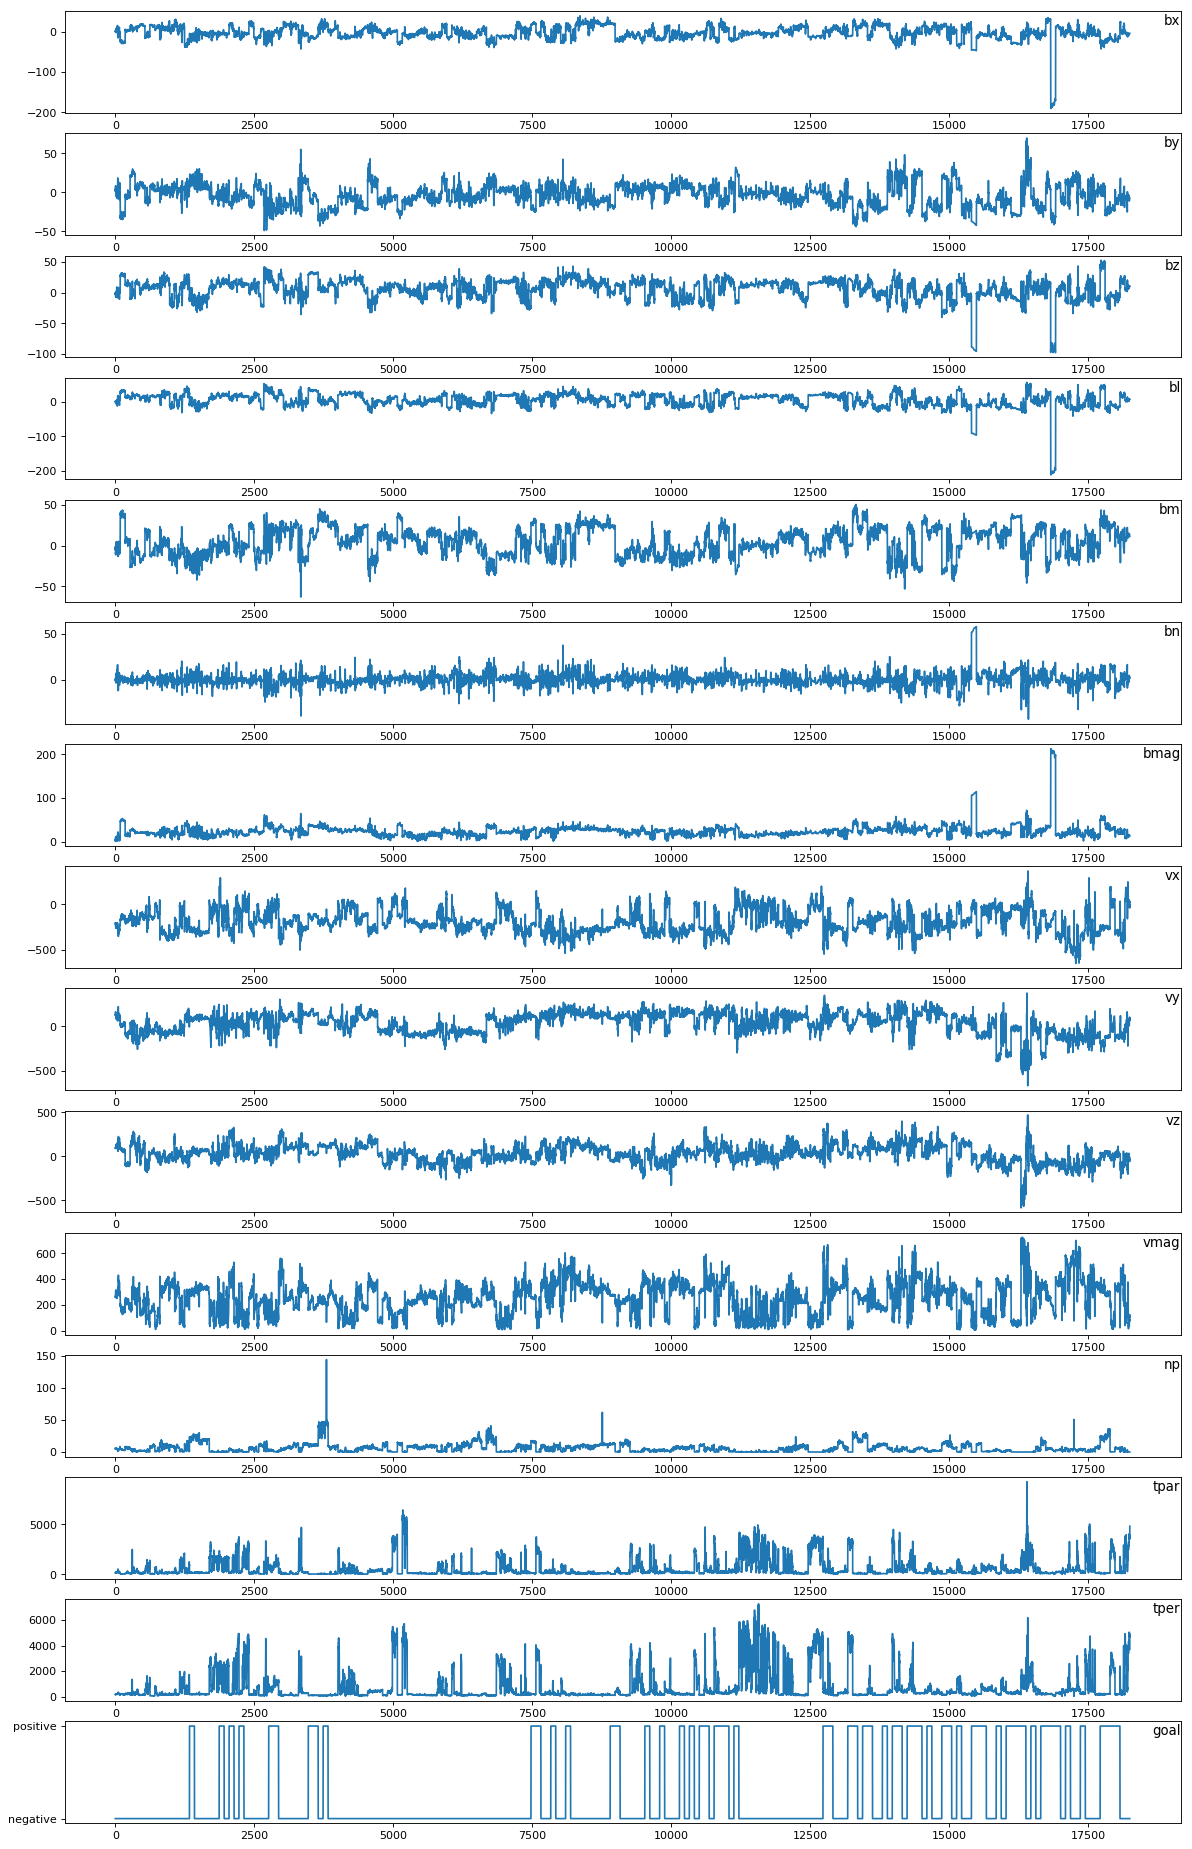

In [4]:
#load the new dataset, specifying first row as header and first coloum as index
dataset = read_csv('intern_dataset_binary.csv', header=0, index_col=0)

values = dataset.values
i=1
# initialize the figure size providing figure features
figure(num=None, figsize=(18, 30), dpi=80, facecolor='w', edgecolor='k')
# plot each column one by one from total 15 columns
for group in range(15):
    #subplot with 15 rows and 1 column, where i represent the row number
    pyplot.subplot(15,1,i)
    #ploting graph with the values for each coloumn
    pyplot.plot(values[:, group])
    #initializing title of the plot where the column name is in the right side
    pyplot.title(dataset.columns[group], y=0.8, loc='right')
    i+=1

pyplot.show()
#showing top 5 rows in the dataset
print(dataset.head(5))

Data Preprocessing Steps:

1.create a function to convert time series dataset into supervised learning dataset

2.Encoding the categorical value of the 'goal' column with the help of sklearn.preprocessing

3.Normalize all the features value between 0 and 1 with the help of sklearn.preprocessing

4.framed the preprocessed times series dataset into a supervised learning dataset

5.As new column generates to frame into supervised learning dataset, further normalization is performed

In [5]:
# function to convert time series data into supervised learning
def time_series_to_supervised(data, lag=1, output=1, removenan=True):
    variable= 1 if type(data) is list else data.shape[1]
    data_frame= pd.DataFrame(data)
    columns, names = list(), list()
    # input sequence (t-n, t-(n-1)....t-1)
    for i in range(lag, 0, -1):
        columns.append(data_frame.shift(i))
        names = names + [('var%d(t-%d)' % (j+1, i)) for j in range(variable)]
    # sequence to forcast (t, t+1, t+2,...t+n)
    for i in range(0, output):
        columns.append(data_frame.shift(-i))
        if i==0:
            names = names + [('var%d(t)'%(j+1)) for j in range(variable)]
        else:
            names = names + [('var%d(t+%d)'% (j+1, i)) for j in range(variable)]
    #concatenating all columns and name
    aggregate= pd.concat(columns, axis=1)
    aggregate.columns= names
    #drop all rows which have NaN as feature values
    if removenan:
            aggregate.dropna(inplace=True)
    return aggregate
    

values = dataset.values
# Encoding the categorical values in 'goal' column
encoder = LabelEncoder()
values[:,14] = encoder.fit_transform(values[:,14])
values = values.astype('float32')
# normalize all features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled= scaler.fit_transform(values)

# frame as supervised learning
reframed = time_series_to_supervised(scaled, 1, 1)
reframed =reframed.astype('float32')
# normalize all features(including old ones) between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed)
#normalized features framed into dataset
reframed = pd.DataFrame(scaled)
print(reframed.head(5))
print(reframed.shape[0])

     bx    by    bz    bl    bm    bn  bmag      vx      vy     vz    vmag  \
0  0.52  3.99 -2.53  0.12 -4.74 -0.33  4.75 -212.49  126.52  94.29  264.67   
1 -0.46  2.83 -0.37  1.47 -2.49 -0.08  2.89 -205.30  121.80  91.70  255.72   
2  0.63  3.69 -2.23  0.10 -4.36 -0.12  4.36 -208.85  119.43  89.61  256.73   
3  1.71  3.79 -1.89 -0.25 -4.46  0.94  4.57 -205.67  124.33  91.95  257.32   
4  0.69  0.82  0.04  0.05 -0.80  0.72  1.08 -212.35  120.57  95.26  262.10   

     np    tpar    tper      goal  
0  5.51  141.67  157.74  negative  
1  6.51  139.22  154.13  negative  
2  6.15  144.39  151.92  negative  
3  6.06  148.72  164.85  negative  
4  5.97  183.88  153.38  negative  
         0         1         2         3         4         5         6   \
0  0.830850  0.446224  0.631946  0.791192  0.511947  0.421807  0.017356   
1  0.826580  0.436446  0.646286  0.796235  0.531711  0.424278  0.008560   
2  0.831329  0.443695  0.633937  0.791117  0.515285  0.423883  0.015512   
3  0.836035  0.

Preparing Training and Testing dataset:

1.As one time series represent 89 rows so diving all rows by 89 will provide us total number of series

2.Dividing 70% of the data into training set and 30% to test set

3.Spliting further input and output for each training set and test set

In [6]:
# split into train and test sets

#calculating total number of series
total_series= math.ceil(reframed.shape[0]/89)

#dividing into training set
training_set= (int)(math.ceil(total_series*0.7)*89)
values = reframed.values

#collecting values until the selected rows for training set
train = values[:training_set, :]

#the rest of the rows are for test set
n_test = values[training_set:, :]

total_series2= math.ceil(n_test.shape[0]/89)
n_validation = (int)(math.ceil(total_series2*0.5)*89)

valadation = n_test[:n_validation, :]
test = n_test[n_validation:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
valadation_X, valadation_y = valadation[:, :-1], valadation[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

Reshaping input into 3D [samples, timesteps, features] to feed into learning model:

In [7]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valadation_X = valadation_X.reshape((valadation_X.shape[0], 1, valadation_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, valadation_X.shape, valadation_y.shape)

(12816, 1, 29) (12816,) (2669, 1, 29) (2669,) (2759, 1, 29) (2759,)


Design network for the problem:

1.Initialize sequential model

2.Add Long Short-Term Memory model with 50 neurons to the model class

3.Initialize activation function as 'sigmoid'

4.Initialize loss function as 'Mean Squared Error', Optimizer as 'adam' and metrics as accuracy

In [8]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                16000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 16,051
Trainable params: 16,051
Non-trainable params: 0
_________________________________________________________________
None


Fit the design network:

1.Provide the training dataset 

2.Define number of epochs

3.Define batch_size for processing

4.Provide dataset for validation

In [9]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=267, validation_data=(valadation_X, valadation_y), verbose=2, shuffle=False)

Train on 12816 samples, validate on 2759 samples
Epoch 1/50
 - 1s - loss: 0.1921 - acc: 0.7779 - val_loss: 0.3080 - val_acc: 0.4516
Epoch 2/50
 - 0s - loss: 0.1447 - acc: 0.8194 - val_loss: 0.3280 - val_acc: 0.4516
Epoch 3/50
 - 0s - loss: 0.1335 - acc: 0.8194 - val_loss: 0.2992 - val_acc: 0.4516
Epoch 4/50
 - 0s - loss: 0.1206 - acc: 0.8194 - val_loss: 0.2393 - val_acc: 0.4516
Epoch 5/50
 - 0s - loss: 0.0973 - acc: 0.8262 - val_loss: 0.1449 - val_acc: 0.9188
Epoch 6/50
 - 0s - loss: 0.0656 - acc: 0.9536 - val_loss: 0.0782 - val_acc: 0.9935
Epoch 7/50
 - 0s - loss: 0.0403 - acc: 0.9926 - val_loss: 0.0455 - val_acc: 0.9935
Epoch 8/50
 - 0s - loss: 0.0243 - acc: 0.9971 - val_loss: 0.0291 - val_acc: 0.9935
Epoch 9/50
 - 0s - loss: 0.0156 - acc: 0.9971 - val_loss: 0.0211 - val_acc: 0.9935
Epoch 10/50
 - 0s - loss: 0.0111 - acc: 0.9971 - val_loss: 0.0167 - val_acc: 0.9935
Epoch 11/50
 - 0s - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0140 - val_acc: 0.9935
Epoch 12/50
 - 0s - loss: 0.0070 - a

Ploting graph of model loss and model accuracy for training process:

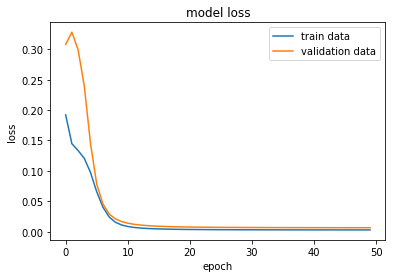

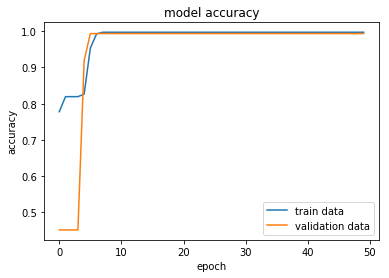

In [10]:
# plot model loss 
pyplot.plot(history.history['loss'], label='train data')
pyplot.plot(history.history['val_loss'], label='validation data')
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()
# plot model accuracy 
pyplot.plot(history.history['acc'], label='train data')
pyplot.plot(history.history['val_acc'], label='validation data')
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

Predict ouput (goal) value from the model:

In [11]:
# Predict value of goal from input
yhat = model.predict(test_X)


Accuracy Measures of the model:

In [12]:
# Accuracy evaluation of the model with test data
acc = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (acc[1]*100))

Accuracy: 99.44%


Root Mean Square Error(RMSE) and ROC curve for the model:

Root Mean Square Error (RMSE): 0.075


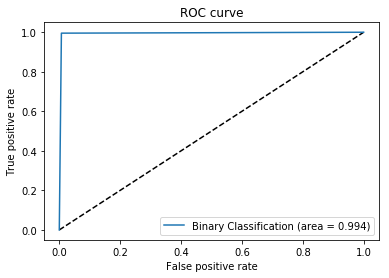

In [13]:
# Reshape test data into 2D
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for predicted data
inv_ypred = concatenate((yhat,test_X), axis=1)

inv_ypred = scaler.inverse_transform(inv_ypred)

inv_ypred = inv_ypred[:,0]

# invert scaling for actual test data
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y,test_X), axis=1)

inv_y = scaler.inverse_transform(inv_y)

inv_y = inv_y[:,0]

# calculate Root Mean Square Error (RMSE)
rmse = sqrt(mean_squared_error(inv_y, inv_ypred))
print('Root Mean Square Error (RMSE): %.3f' % rmse)

pred=[]
for each in inv_ypred:
    if(each+0.5>math.ceil(each)):
        pred.append(math.ceil(each))
    else:
        pred.append(math.floor(each))

act=[]
for each in inv_y:
    if(each+0.5>math.ceil(each)):
        act.append(math.ceil(each))
    else:
        act.append(math.floor(each))

#importing roc_curve library from sklearn.metrics
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(act, pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

pyplot.figure(1)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr_keras, tpr_keras, label='Binary Classification (area = {:.3f})'.format(auc_keras))

pyplot.xlabel('False positive rate')
pyplot.ylabel('True positive rate')
pyplot.title('ROC curve')
pyplot.legend(loc='best')
pyplot.show()